In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import os
print (os.path.abspath('.'))

/Users/vivian


In [18]:
data2014=pd.read_csv('2014.csv')
data2014.head()

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE
0,"2,4-D",2014,1,1,1698.6,1885.5
1,"2,4-D",2014,1,3,7513.6,8472.4
2,"2,4-D",2014,1,5,2613.6,2889.4
3,"2,4-D",2014,1,7,1259.2,1277.7
4,"2,4-D",2014,1,9,7590.5,7756.1


In [19]:
data2015=pd.read_csv('2015.csv')
data2015.head()

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE
0,1-Methyl Cyclopropene,2015,41,1,NaN,0.0
1,1-Methyl Cyclopropene,2015,41,21,NaN,0.1
2,1-Methyl Cyclopropene,2015,41,27,NaN,1.7
3,1-Methyl Cyclopropene,2015,41,49,NaN,0.1
4,1-Methyl Cyclopropene,2015,41,55,NaN,0.0


In [20]:
states=pd.read_csv('dictionary.csv')
states.head()

,STATE_CODE,COUNTY_CODE,COUNTY,STATE
0,1,1,Autauga County,AL
1,1,3,Baldwin County,AL
2,1,5,Barbour County,AL
3,1,7,Bibb County,AL
4,1,9,Blount County,AL


In [27]:
data2014_states=data2014.merge(states, how='left', on=['STATE_CODE', 'COUNTY_CODE'])
data2015_states=data2015.merge(states, how='left', on=['STATE_CODE', 'COUNTY_CODE'])
data2014_states.head()

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE,COUNTY,STATE
0,"2,4-D",2014,1,1,1698.6,1885.5,Autauga County,AL
1,"2,4-D",2014,1,3,7513.6,8472.4,Baldwin County,AL
2,"2,4-D",2014,1,5,2613.6,2889.4,Barbour County,AL
3,"2,4-D",2014,1,7,1259.2,1277.7,Bibb County,AL
4,"2,4-D",2014,1,9,7590.5,7756.1,Blount County,AL


In [28]:
data2015_states.head()

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE,COUNTY,STATE
0,1-Methyl Cyclopropene,2015,41,1,NaN,0.0,Baker County,OR
1,1-Methyl Cyclopropene,2015,41,21,NaN,0.1,Gilliam County,OR
2,1-Methyl Cyclopropene,2015,41,27,NaN,1.7,Hood River County,OR
3,1-Methyl Cyclopropene,2015,41,49,NaN,0.1,Morrow County,OR
4,1-Methyl Cyclopropene,2015,41,55,NaN,0.0,Sherman County,OR


In [29]:
data2014_states.info(),data2015_states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392433 entries, 0 to 392432
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   COMPOUND       392433 non-null  object 
 1   YEAR           392433 non-null  int64  
 2   STATE_CODE     392433 non-null  int64  
 3   COUNTY_CODE    392433 non-null  int64  
 4   LOW_ESTIMATE   273406 non-null  float64
 5   HIGH_ESTIMATE  392433 non-null  float64
 6   COUNTY         392433 non-null  object 
 7   STATE          392433 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.9+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 369763 entries, 0 to 369762
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   COMPOUND       369763 non-null  object 
 1   YEAR           369763 non-null  int64  
 2   STATE_CODE     369763 non-null  int64  
 3   COUNTY_CODE    369763 non-null  int64

(None, None)

In [30]:
data2014_states['LOW_ESTIMATE']=data2014_states.LOW_ESTIMATE.fillna(-1)
data2015_states['LOW_ESTIMATE']=data2015_states.LOW_ESTIMATE.fillna(-1)

In [31]:
print(data2014_states[data2014_states.LOW_ESTIMATE.isnull()==True].size)
print(data2015_states[data2015_states.LOW_ESTIMATE.isnull()==True].size)

0
0


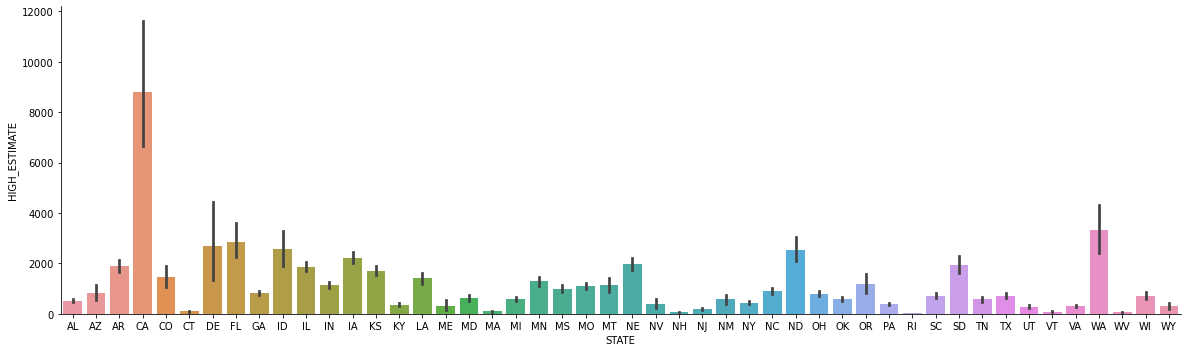

In [37]:
sns.catplot(x='STATE',y='HIGH_ESTIMATE',kind='bar',data=data2014_states)
fig=plt.gcf()
fig.set_size_inches(20,5)

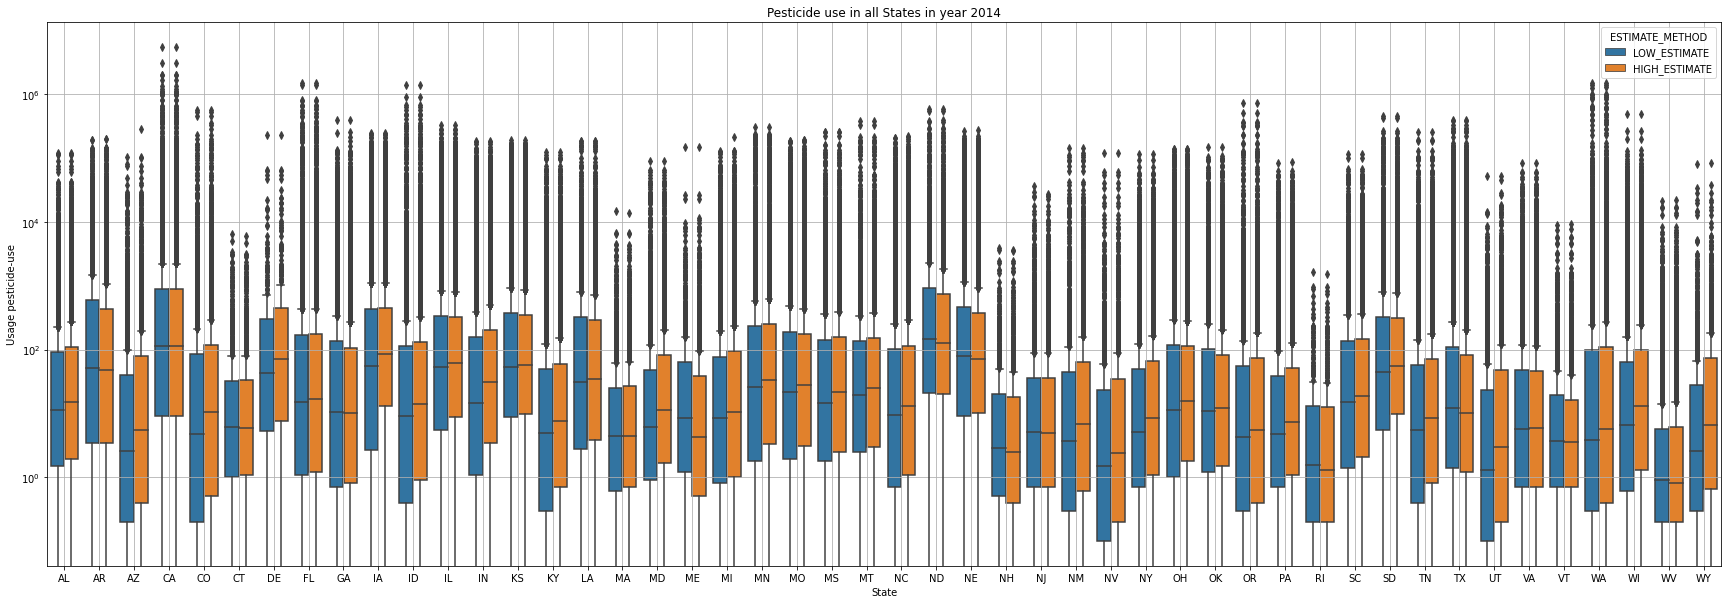

In [41]:
temp_l=data2014_states[data2014_states.LOW_ESTIMATE!=-1].copy()
temp_l.loc[:,'ESTIMATE_METHOD']='LOW_ESTIMATE'
temp_l.loc[:,'estimate']=temp_l.LOW_ESTIMATE
temp_h=data2014_states
temp_h.loc[:,'ESTIMATE_METHOD']='HIGH_ESTIMATE'
temp_h.loc[:,'estimate']=temp_h.HIGH_ESTIMATE
temp=pd.concat([temp_l,temp_h],axis=0).sort_values('STATE')

plt.figure(figsize=(30,10))
sns.boxplot(x='STATE', y='estimate', hue='ESTIMATE_METHOD', data=temp)
plt.yscale('log')
plt.xlabel('State')
plt.ylabel('Usage pesticide-use')
plt.title('Pesticide use in all States in year 2014')
plt.grid()

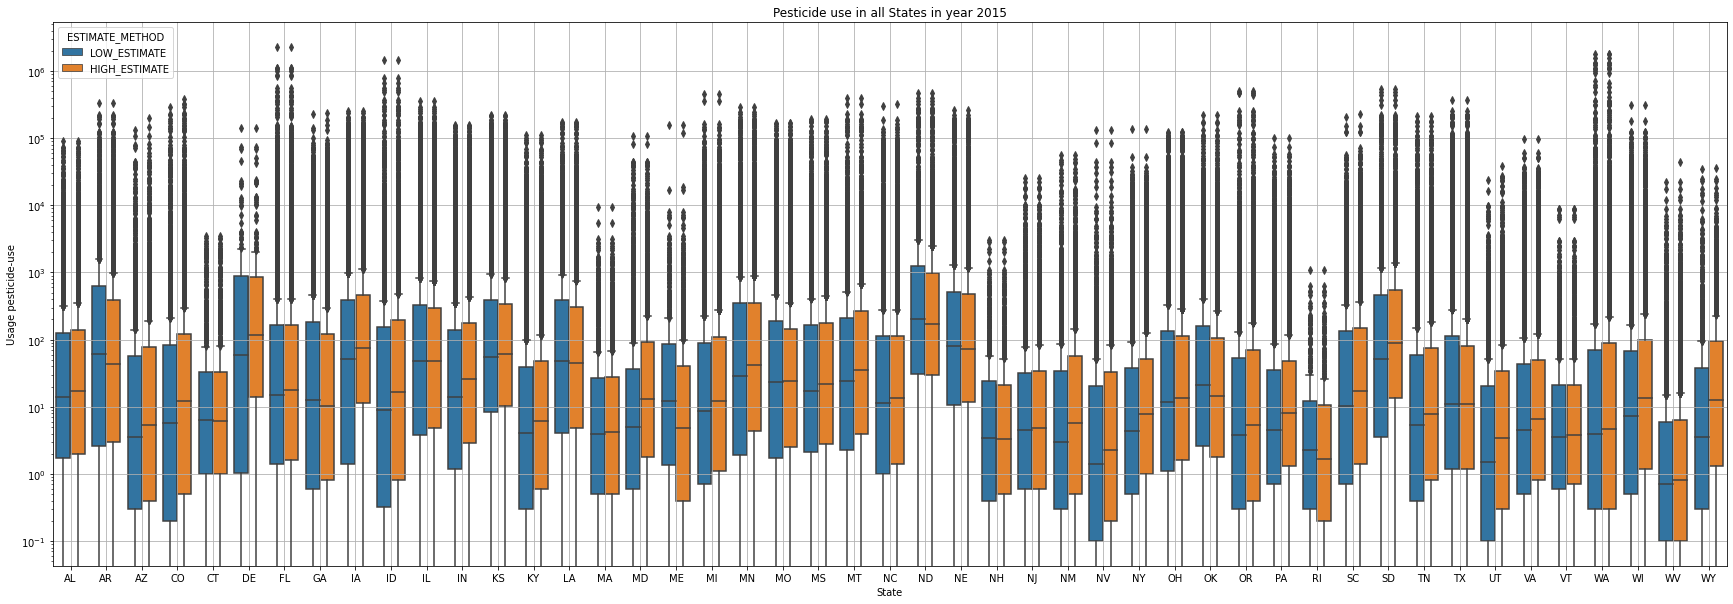

In [42]:
temp_low=data2015_states[data2015_states.LOW_ESTIMATE!=-1].copy()
temp_low.loc[:,'ESTIMATE_METHOD']='LOW_ESTIMATE'
temp_low.loc[:,'estimate']=temp_low.LOW_ESTIMATE
temp_high=data2015_states
temp_high.loc[:,'ESTIMATE_METHOD']='HIGH_ESTIMATE'
temp_high.loc[:,'estimate']=temp_high.HIGH_ESTIMATE
temp1=pd.concat([temp_low,temp_high],axis=0).sort_values('STATE')

plt.figure(figsize=(30,10))
sns.boxplot(x='STATE', y='estimate', hue='ESTIMATE_METHOD', data=temp1)
plt.yscale('log')
plt.xlabel('State')
plt.ylabel('Usage pesticide-use')
plt.title('Pesticide use in all States in year 2015')
plt.grid()

Text(0.5, 1.0, 'Mean value of pesticide use of all states in 2015')

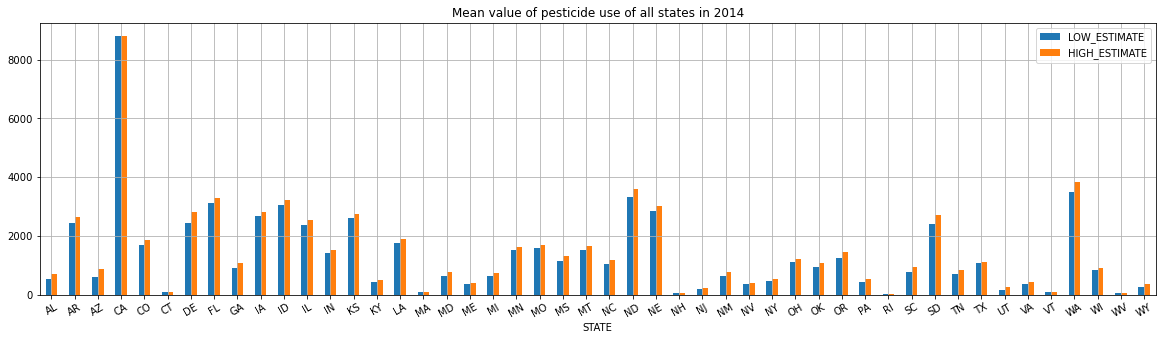

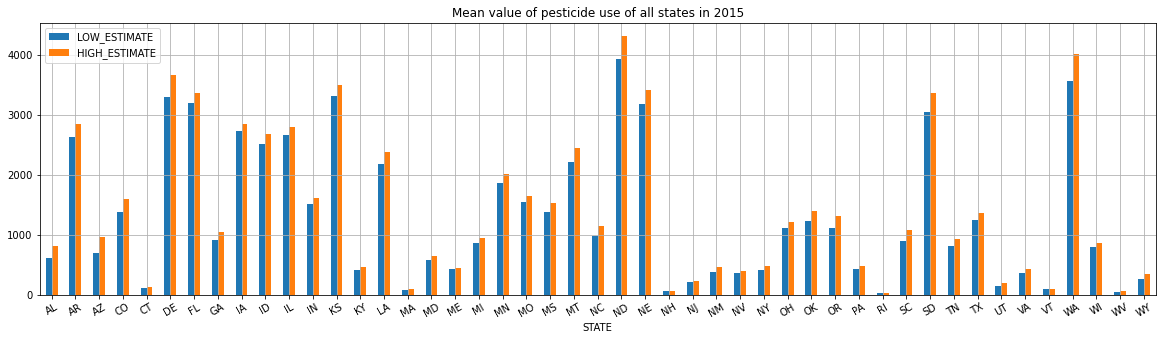

In [66]:
states2014mean=data2014_states[data2014_states.LOW_ESTIMATE!=-1][['STATE','LOW_ESTIMATE','HIGH_ESTIMATE']].groupby('STATE').mean()
states2015mean=data2015_states[data2015_states.LOW_ESTIMATE!=-1][['STATE','LOW_ESTIMATE','HIGH_ESTIMATE']].groupby('STATE').mean()
states2014mean.plot(kind='bar',grid=True,figsize=(20,5))
plt.xticks(rotation=30)
plt.title('Mean value of pesticide use of all states in 2014')
states2015mean.plot(kind='bar',grid=True,figsize=(20,5))
plt.xticks(rotation=30)
plt.title('Mean value of pesticide use of all states in 2015')

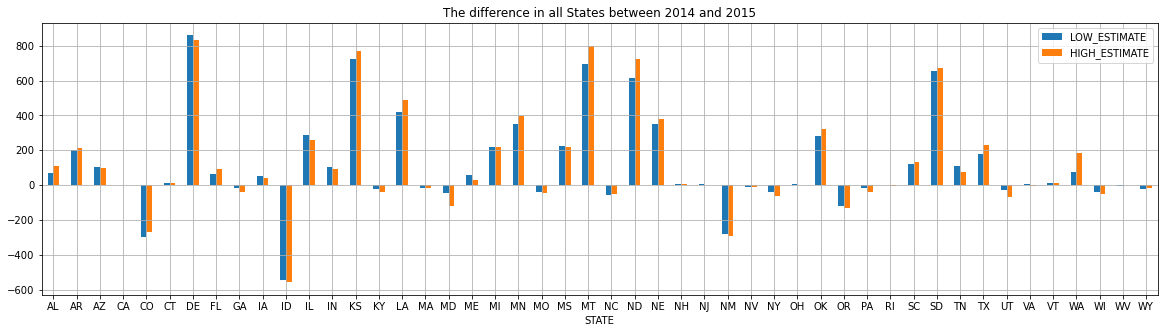

In [67]:
(states2015mean - states2014mean).fillna(0).plot(kind='bar',grid=True,figsize=(20,5))
plt.xticks(rotation=0)
plt.legend(loc=1)
plt.title('The difference in all States between 2014 and 2015')
plt.show()

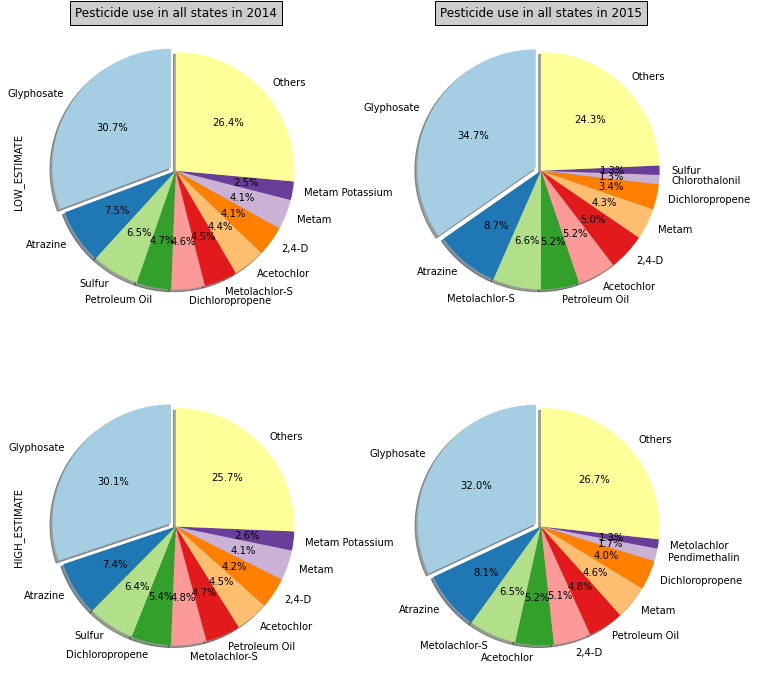

In [64]:
num = 10
startangle =90
compound2014_sum = data2014_states[data2014_states.LOW_ESTIMATE != -1].groupby(['COMPOUND']).sum()
compound2015_sum = data2015_states[data2015_states.LOW_ESTIMATE != -1].groupby(['COMPOUND']).sum()
labels2014 = compound2014_sum.LOW_ESTIMATE.sort_values(ascending = False).head(num).index.append(pd.Index(['Others']))
fracs2014 = compound2014_sum.LOW_ESTIMATE.sort_values(ascending = False).head(num)
fracs2014 = fracs2014.append(pd.Series(compound2014_sum.LOW_ESTIMATE.sort_values(ascending = False).tail(-num).sum()))
labels2015 = compound2015_sum.LOW_ESTIMATE.sort_values(ascending = False).head(num).index.append(pd.Index(['Others']))
fracs2015 = compound2015_sum.LOW_ESTIMATE.sort_values(ascending = False).head(num)
fracs2015 = fracs2015.append(pd.Series(compound2015_sum.LOW_ESTIMATE.sort_values(ascending = False).tail(-num).sum()))

explode= (0.05,) + (0,)*(num)
color = sns.color_palette("Paired")

plt.figure(1,figsize=(12,12))
plt.subplot(2,2,1)
plt.pie(fracs2014, explode=explode, labels=labels2014,autopct='%1.1f%%', shadow=True, startangle=startangle, colors = color)
plt.title('Pesticide use in all states in 2014', bbox={'facecolor':'0.8', 'pad':5})
plt.ylabel('LOW_ESTIMATE')

plt.subplot(2,2,2)
plt.pie(fracs2015, explode=explode, labels=labels2015,
                autopct='%1.1f%%', shadow=True, startangle=startangle, colors = color)
plt.title('Pesticide use in all states in 2015', bbox={'facecolor':'0.8', 'pad':5})

# HIGH_ESTIMATE
compound2014_sum = data2014_states[data2014_states.LOW_ESTIMATE != -1].groupby(['COMPOUND']).sum()
compound2015_sum = data2015_states[data2015_states.LOW_ESTIMATE != -1].groupby(['COMPOUND']).sum()

labels2014 = compound2014_sum.HIGH_ESTIMATE.sort_values(ascending = False).head(num).index.append(pd.Index(['Others']))
fracs2014 = compound2014_sum.HIGH_ESTIMATE.sort_values(ascending = False).head(num)
fracs2014 = fracs2014.append(pd.Series(compound2014_sum.LOW_ESTIMATE.sort_values(ascending = False).tail(-num).sum()))

labels2015 = compound2015_sum.HIGH_ESTIMATE.sort_values(ascending = False).head(num).index.append(pd.Index(['Others']))
fracs2015 = compound2015_sum.HIGH_ESTIMATE.sort_values(ascending = False).head(num)
fracs2015 = fracs2015.append(pd.Series(compound2015_sum.HIGH_ESTIMATE.sort_values(ascending = False).tail(-num).sum()))

plt.subplot(2,2,3)
plt.pie(fracs2014, explode=explode, labels=labels2014,autopct='%1.1f%%', shadow=True, startangle=startangle, colors = color)
plt.ylabel('HIGH_ESTIMATE')

plt.subplot(2,2,4)
plt.pie(fracs2015, explode=explode, labels=labels2015,autopct='%1.1f%%', shadow=True, startangle=startangle, colors = color)
plt.show()